# Part-1 : Section A
Training a multi-exit ElasticBERT model on SST-2 dataset

In [ ]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ['CUDA_VISIBLE_DEVICES']='2'
# os.environ["CUDA_LAUNCH_BLOCKING"]="1"


In [2]:
# The code closely follows the original ElasticBERT repository
# Feature to train models with a given exit configuration is added
# !git clone https://github.com/MLiONS/MutiExitDNNs.git


%cd /home/divya/UBERT/MutiExitDNNs/ElasticBERT
# !pip install -r requirements.txt

[Errno 2] No such file or directory: '/home/divya/UBERT/MutiExitDNNs/ElasticBERT'
/home/aix7101/jeong/CeeBERT


/home/aix7101/anaconda3/envs/j_ceebert/lib/python3.9/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [3]:
pwd

'/home/aix7101/jeong/CeeBERT'

In [4]:
#All the hyper-parameters/ location to training dataset are set in
#MultiExitDNNs -> finetune-dynamic -> finetune_elue_entropy.sh file

#1)Set the correct location to SST-2 dataset
#All models are trained on SST-2 "train" split and evaluated on "dev" split
#"train.tsv" and "dev.tsv" are expected to be in ELUE_DIR/TASK_NAME
#You can set both ELUE_DIR and TASK_NAME in finetune_elue_entropy.sh
#Or change the dataset directory using "data_dir" option

#2)Please change the "num_output_layers" option as per the desired exit-configuration

#3)Model checkpoints will be saved at "output_dir" and
#logs will be available at "log_dir"
# bash finetune_elue_entropy.sh

# Part-1 : Section B
Generating the prediction matrix

In [5]:
#Evaluation on other datasets-IMDb or Yelp

In [6]:
import os
print(os.getcwd())

/home/aix7101/jeong/CeeBERT


In [7]:
cd ElasticBERT/finetune-dynamic

/home/aix7101/jeong/CeeBERT/ElasticBERT/finetune-dynamic


/home/aix7101/anaconda3/envs/j_ceebert/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [8]:
from transformers import BertTokenizer as ElasticBertTokenizer

#Set the current directory location inside "finetune-dynamic" folder
# cd /home/divya/UBERT/MutiExitDNNs/ElasticBERT/finetune-dynamic

from models.configuration_elasticbert import ElasticBertConfig
from models.modeling_elasticbert_entropy import ElasticBertForSequenceClassification

/home/aix7101/anaconda3/envs/j_ceebert/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
path = '/mnt/aix7101/jeong/fnlp/elasticbert-base'

In [10]:
#Set location to the best performing model
#Model checkpoints are saved at "output_dir" from Part-1: Section A
checkpoint_snli = path + '/ckpts/elue/entropy/SNLI/checkpoint-25700'
checkpoint_sst = path + '/ckpts/elue/entropy/SST-2/checkpoint-300'
checkpoint_mrpc = path + '/ckpts/elue/entropy/MRPC/checkpoint-575'
checkpoint_scitail = path + '/ckpts/elue/entropy/SciTail/checkpoint-3690'
checkpoint_rte = path + '/ckpts/elue/entropy/RTE/checkpoint-390'
checkpoint_mnli = path + '/ckpts/elue/entropy/MNLI/checkpoint-61360'
checkpoint_qnli = path + '/ckpts/elue/entropy/QNLI/checkpoint-16370'
checkpoint_qqp = path + '/ckpts/elue/entropy/QQP/checkpoint-56855'


In [11]:
config = ElasticBertConfig.from_pretrained(checkpoint_sst)
tokenizer = ElasticBertTokenizer.from_pretrained(checkpoint_sst)
model = ElasticBertForSequenceClassification.from_pretrained(checkpoint_sst)
#model

/home/aix7101/anaconda3/envs/j_ceebert/lib/python3.9/site-packages/transformers/modeling_utils.py:1205: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load

In [12]:
def get_args(arg_vec):
    parser = argparse.ArgumentParser()

    # Required parameters
    parser.add_argument(
        "--num_hidden_layers",
        default=None,
        type=int,
        required=True,
        help='The number of layers to import.',
    )
    parser.add_argument(
        "--num_output_layers",
        nargs = 12,
        default=None,
        type=int,
        required=True,
        help='The number of layers to output.',
    )
    parser.add_argument(
        "--data_dir",
        default=None,
        type=str,
        required=True,
        help="The input data dir. Should contain the .tsv files (or other data files) for the task.",
    )
    parser.add_argument(
        "--model_name_or_path",
        default=None,
        type=str,
        required=True,
        help="Path to pre-trained model or shortcut name.",
    )
    parser.add_argument(
        "--task_name",
        default=None,
        type=str,
        required=True,
        help="The name of the task to train selected in the list.",
    )
    parser.add_argument(
        "--output_dir",
        default=None,
        type=str,
        required=True,
        help="The output directory where the model predictions and checkpoints will be written.",
    )
    parser.add_argument(
        "--log_dir",
        default=None,
        type=str,
        required=True,
        help="The output directory where the logs will be written.",
    )
    parser.add_argument(
        "--spec_eval",
        default=None,
        type=str,
        required=False,
        help="'Set as train or test based on specific split on which to evaluate'"
    )
    parser.add_argument(
        "--patience",
        default='0',
        type=str,
        required=False,
    )
    parser.add_argument(
        "--regression_threshold",
        default=0,
        type=float,
        required=False,
    )
    parser.add_argument(
        "--early_exit_entropy",
        default='0.1',
        type=str,
        required=False,
    )
    # Other parameters
    parser.add_argument(
        "--load",
        default=None,
        type=str,
        help="The path of ckpts used to continue training."
    )
    parser.add_argument(
        "--config_name",
        default="",
        type=str,
        help="Pretrained config name or path if not the same as model_name",
    )
    parser.add_argument(
        "--tokenizer_name",
        default="",
        type=str,
        help="Pretrained tokenizer name or path if not the same as model_name",
    )
    parser.add_argument(
        "--cache_dir",
        default="",
        type=str,
        help="Where do you want to store the pre-trained models downloaded from huggingface.co",
    )
    parser.add_argument(
        "--max_seq_length",
        default=128,
        type=int,
        help="The maximum total input sequence length after tokenization. Sequences longer "
             "than this will be truncated, sequences shorter will be padded.",
    )
    parser.add_argument("--debug", action="store_true", help="Whether to use debug mode.")
    parser.add_argument("--do_train", action="store_true", help="Whether to run training.")
    parser.add_argument("--do_eval", action="store_true", help="Whether to run eval on the dev set.")
    parser.add_argument(
        "--evaluate_during_training",
        action="store_true",
        help="Run evaluation during training at each logging step.",
    )
    parser.add_argument(
        "--do_lower_case",
        action="store_true",
        help="Set this flag if you are using an uncased model.",
    )
    parser.add_argument(
        "--per_gpu_train_batch_size",
        default=8,
        type=int,
        help="Batch size per GPU/CPU for training.",
    )
    parser.add_argument(
        "--per_gpu_eval_batch_size",
        default=1,
        type=int,
        help="Batch size per GPU/CPU for evaluation.",
    )
    parser.add_argument(
        "--gradient_accumulation_steps",
        type=int,
        default=1,
        help="Number of updates steps to accumulate before performing a backward/update pass.",
    )
    parser.add_argument(
        "--learning_rate",
        default=5e-5,
        type=float,
        help="The initial learning rate for Adam.",
    )
    parser.add_argument("--weight_decay", default=0.01, type=float, help="Weight decay if we apply some.")
    parser.add_argument("--adam_epsilon", default=1e-8, type=float, help="Epsilon for Adam optimizer.")
    parser.add_argument("--max_grad_norm", default=1.0, type=float, help="Max gradient norm.")
    parser.add_argument(
        "--num_train_epochs",
        default=3.0,
        type=float,
        help="Total number of training epochs to perform.",
    )
    parser.add_argument(
        "--max_steps",
        default=-1,
        type=int,
        help="If > 0: set total number of training steps to perform. Override num_train_epochs.",
    )
    parser.add_argument("--warmup_steps", default=0, type=int, help="Linear warmup over warmup_steps.")
    parser.add_argument("--warmup_rate", default=0, type=float, help="Linear warmup over warmup_rate.")

    parser.add_argument("--logging_steps", type=int, default=500, help="Log every X updates steps.")
    parser.add_argument(
        "--save_steps",
        type=int,
        default=500,
        help="Save checkpoint every X updates steps.",
    )
    parser.add_argument(
        "--eval_all_checkpoints",
        action="store_true",
        help="Evaluate all checkpoints starting with the same prefix as model_name ending and ending with step number",
    )
    parser.add_argument("--no_cuda", action="store_true", help="Avoid using CUDA when available")
    parser.add_argument(
        "--overwrite_output_dir",
        action="store_true",
        help="Overwrite the content of the output directory",
    )
    parser.add_argument(
        "--overwrite_cache",
        action="store_true",
        help="Overwrite the cached training and evaluation sets",
    )
    parser.add_argument(
        "--not_save_model",
        action="store_true",
        help="Do not save model checkpoints"
    )
    parser.add_argument("--seed", type=int, default=6, help="random seed for initialization")

    parser.add_argument(
        "--fp16",
        action="store_true",
        help="Whether to use 16-bit (mixed) precision (through NVIDIA apex) instead of 32-bit",
    )
    parser.add_argument(
        "--fp16_opt_level",
        type=str,
        default="O1",
        help="For fp16: Apex AMP optimization level selected in ['O0', 'O1', 'O2', and 'O3']."
             "See details at https://nvidia.github.io/apex/amp.html",
    )
    parser.add_argument(
        "--local_rank",
        type=int,
        default=-1,
        help="For distributed training: local_rank",
    )
    parser.add_argument("--server_ip", type=str, default="", help="For distant debugging.")
    parser.add_argument("--server_port", type=str, default="", help="For distant debugging.")
    args = parser.parse_args(arg_vec)

    return args

In [13]:
print("model.config.num_labels =", model.config.num_labels)

model.config.num_labels = 2


In [14]:
import torch

In [15]:
##-- loss 계산을 위해 num_labels를 task에 맞춰서 변경해줘야함
model.config.num_labels = 3
model.classifier = torch.nn.Linear(model.config.hidden_size, 3)

In [16]:
print("model.config.num_labels =", model.config.num_labels)

model.config.num_labels = 3


In [17]:
from load_data import (
    load_and_cache_examples_glue,
    load_and_cache_examples_elue,
)

def evaluate_elue_entropy(args, model, tokenizer, prefix="", eval_highway=False, entropy=0.):
    model.elasticbert.set_early_exit_entropy(entropy)
    model.elasticbert.set_eval_state(eval_highway)
    model.elasticbert.reset_stats()

    eval_task = args.task_name.lower()
    eval_output_dir = args.output_dir

    num_op_layers = args.num_output_layers

    results = {}
    results_all = []
    exit_layer = []
    for i in range(sum(num_op_layers)):
        results_all.append({})

    if args.spec_eval:
      eval_dataset = load_and_cache_examples_elue(args, eval_task, tokenizer, data_type=args.spec_eval)
    else:
      eval_dataset = load_and_cache_examples_elue(args, eval_task, tokenizer, data_type='train')

    if not os.path.exists(eval_output_dir) and args.local_rank in [-1, 0]:
        os.makedirs(eval_output_dir)

    args.eval_batch_size = args.per_gpu_eval_batch_size * max(1, args.n_gpu)
    # Note that DistributedSampler samples randomly
    eval_sampler = SequentialSampler(eval_dataset)
    eval_dataloader = DataLoader(eval_dataset, sampler=eval_sampler, batch_size=args.eval_batch_size)

    # multi-gpu eval
    if args.n_gpu > 1 and not isinstance(model, torch.nn.DataParallel):
        model = torch.nn.DataParallel(model)

    # Eval!
    logger.info("***** Running evaluation {} *****".format(prefix))
    logger.info("  Num examples = %d", len(eval_dataset))
    logger.info("  Batch size = %d", args.eval_batch_size)
    eval_loss = 0.0
    nb_eval_steps = 0
    preds = None
    preds_all = []
    pred_tuple = []
    for i in range(sum(num_op_layers)):
        preds_all.append(None)
        pred_tuple.append(None)
    out_label_ids = None

    for batch in tqdm(eval_dataloader, desc="Evaluating"):
        labels = batch[-1]
        model.eval()
        batch = tuple(t.to(args.device) for t in batch)

        with torch.no_grad():
            inputs = {
                "input_ids": batch[0],
                "attention_mask": batch[1],
                "labels": batch[-1],
            }
            inputs["token_type_ids"] = batch[2]
            outputs = model(**inputs)
            tmp_eval_loss, logits = outputs[:2]

            eval_loss += tmp_eval_loss.mean().item()
        nb_eval_steps += 1
        if out_label_ids is None:
            out_label_ids = inputs["labels"].detach().cpu().numpy()
        else:
            out_label_ids = np.append(out_label_ids, inputs["labels"].detach().cpu().numpy(), axis=0)
        if not eval_highway:
            for i, pred in enumerate(preds_all):
                if pred is None:
                    preds_all[i] = logits[i].detach().cpu().numpy()
                else:
                    preds_all[i] = np.append(pred, logits[i].detach().cpu().numpy(), axis=0)
        else:
            if preds is None:
                preds = logits.detach().cpu().numpy()
            else:
                preds = np.append(preds, logits.detach().cpu().numpy(), axis=0)

    eval_loss = eval_loss / nb_eval_steps
    if args.output_mode == "classification":
        if not eval_highway:
            for i, pred in enumerate(preds_all):
                preds_all[i] = np.argmax(pred, axis = 1)
                pred_tuple[i] = pred
        else:
            preds = np.argmax(preds, axis = 1)
            pred_tuple[i] = pred

    elif args.output_mode == "regression":
        if not eval_highway:
            for i, pred in enumerate(preds_all):
                preds_all[i] = np.squeeze(pred)
        else:
            preds = np.squeeze(preds)

    if not eval_highway:
        for i, pred in enumerate(preds_all):
            if eval_task == 'rte' or 'qnli' or 'wnli' or 'qqp':
                eval_task = 'scitail'
            if eval_task == 'mnli':
                eval_task = 'snli'
            if eval_task == 'yelp':
              eval_task = 'imdb'
            result = elue_compute_metrics(eval_task, pred, out_label_ids)
            results_all[i].update(result)

    else:
        if eval_task == 'rte' or 'qnli' or 'wnli' or 'qqp':
                eval_task = 'scitail'
        if eval_task == 'mnli':
                eval_task = 'snli'
        result = elue_compute_metrics(eval_task, preds, out_label_ids)
        results.update(result)

        logger.info("***** Eval results {} *****".format(prefix))
        for key in sorted(result.keys()):
            logger.info("  %s = %s", key, str(result[key]))
            print("  %s = %s" % (key, str(result[key])))

        exiting_layer_every_ins = model.elasticbert.exiting_layer_every_ins
        exit_layer.append(exiting_layer_every_ins)

    if eval_highway:
        speed_up = model.elasticbert.log_stats()
        return results, speed_up, exit_layer

    if args.spec_eval:
      return results_all, preds_all, pred_tuple, out_label_ids

    return results_all, preds_all, pred_tuple , out_label_ids
    #return results_all, preds_all, out_label_ids


In [18]:
ELUE_DIR='/mnt/aix7101/jeong/fnlp/elasticbert-base'
TASK_NAME='SST-2'

arg_vec= ['--model_name_or_path', 'fnlp/elasticbert-base',
  '--task_name', 'SST-2', \
  '--do_train', \
  '--do_lower_case', \
  '--data_dir', "/home/divya/UBERT/elue_data", \
  '--log_dir', '/mnt/aix7101/jeong/fnlp/elasticbert-base/log/elue/entropy/SNLI-BTestCheck', \
  '--output_dir', '/mnt/aix7101/jeong/fnlp/elasticbert-base/ckpts/elue/entropy/SNLI-BTestCheck', \
  '--num_hidden_layers', '12', \
  '--num_output_layers', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', \
  '--max_seq_length', '128', \
  '--per_gpu_train_batch_size', '32', \
  '--per_gpu_eval_batch_size',' 32', \
  '--learning_rate', '2e-5', \
  '--weight_decay', '0.1', \
  '--save_steps', '50', \
  '--logging_steps', '50', \
  '--num_train_epochs', '5',  \
  '--warmup_rate', '0.06', \
  '--evaluate_during_training', \
  '--overwrite_output_dir'
]

import argparse
parser = argparse.ArgumentParser()

args = get_args(arg_vec)

In [19]:
import torch
if args.local_rank == -1 or args.no_cuda:
    device = torch.device("cuda" if torch.cuda.is_available() and not args.no_cuda else "cpu")
    args.n_gpu = torch.cuda.device_count()
else:  # Initializes the distributed backend which will take care of sychronizing nodes/GPUs
    torch.cuda.set_device(args.local_rank)
    device = torch.device("cuda", args.local_rank)
    torch.distributed.init_process_group(backend="nccl")
    args.n_gpu = 1
args.device = device

args.output_mode = 'classification'

print(args.device)
model.to(args.device)
print(args.n_gpu)

cuda
1


In [20]:
# !git clone https://github.com/hsm207/imdb_data.git

In [21]:
# %cd imdb_data
# !pip install -r requirements.txt

In [22]:
# !tf_upgrade_v2 --infile create_imdb_dataset.py --outfile bar.py

In [23]:
# !python bar.py --output_dir /home/divya/UBERT/elue_data/imdb_data/imdb_dataset

In [24]:
#Custom Selection
# dataset = 'SNLI'#'IMDb' #or 'Yelp'
# data_split = 'train'
#To check model performance on SST-2 dev split:
#Please set dataset = 'SST-2' and data_split='dev'
dataset = 'SST-2'
data_split='dev'

In [25]:
import numpy as np
import pandas as pd

def get_preds(eval_dataset='SNLI', data_split='train'):
  args.spec_eval = False
  args.task_name = eval_dataset.lower()
  args.data_dir=ELUE_DIR + '/'+args.task_name

  results_all, exit_preds, pred_tuple, op_labels = evaluate_elue_entropy(args, model, tokenizer)


  # exit_preds_list = np.stack(exit_preds, axis=1)
  # df = pd.DataFrame((exit_preds_list) )
  # df['op_labels'] = op_labels

  return  results_all, exit_preds, pred_tuple, op_labels

In [26]:
# from datasets import load_dataset
# import pandas as pd
# import os

# # 1. SNLI 데이터셋 불러오기
# dataset = load_dataset("snli", split="train")

# # 2. 사용할 컬럼만 선택 (라벨이 유효한 것만 필터링)
# filtered = dataset.filter(lambda x: x['label'] != -1)

# # 3. 데이터프레임으로 변환
# df = pd.DataFrame({
#     "premise": filtered["premise"],
#     "hypothesis": filtered["hypothesis"],
#     "label": filtered["label"]
# })

# # 4. 저장 경로 설정
# save_dir = "/mnt/aix7101/jeong/fnlp/elasticbert-base/snli"
# os.makedirs(save_dir, exist_ok=True)
# save_path = os.path.join(save_dir, "train.tsv")

# # 5. TSV 파일로 저장
# df.to_csv(save_path, sep="\t", index=False)

# print(f"✅ Saved SNLI train.tsv to: {save_path}")

In [27]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

이미 모델을 GPU에 올린 적이 있으면 해당 데이터에서 에러가 날 수 있으므로 아예 restart하는 것도 좋은 방법임

In [28]:
from elue import elue_compute_metrics
import logging
logger = logging.getLogger(__name__)
from torch.utils.data import DataLoader, SequentialSampler
from torch.utils.data.distributed import DistributedSampler
import os
from tqdm import tqdm
results, final_preds, pred_tuple, op_labels = get_preds(eval_dataset=dataset, data_split=data_split)

/home/aix7101/jeong/CeeBERT/ElasticBERT/finetune-dynamic/load_data.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  features = torch.load(cached_features_file)
Evaluati

In [29]:
(len(pred_tuple[-1]))

67349

In [30]:
print(len(op_labels))
print(len(final_preds))
print(len(final_preds[0]))   

67349
7
67349


In [31]:
accurac_imd = []
for j in range(sum(args.num_output_layers)):
    accuracy = 0
    for i in range(len(op_labels)):
        if final_preds[j][i] == op_labels[i]:
            accuracy+=1
        else:
            pass
    accurac_imd.append(accuracy/len(op_labels))

In [32]:
accurac_yelp = []
for j in range(sum(args.num_output_layers)):
    accuracy = 0
    for i in range(len(op_labels)):
        if final_preds[j][i] == op_labels[i]:
            accuracy+=1
        else:
            pass
    accurac_yelp.append(accuracy/len(op_labels))

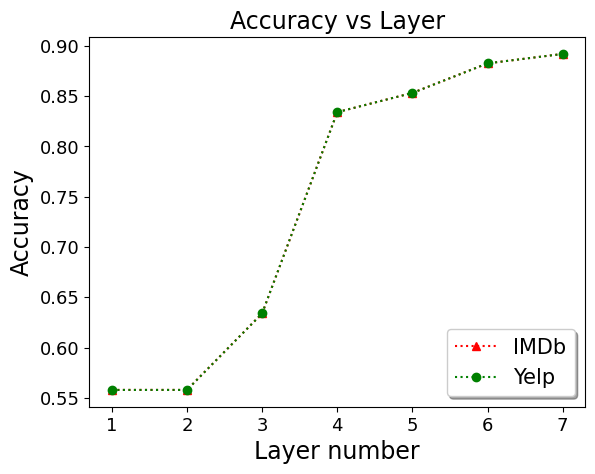

In [33]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7]
plt.plot(x, accurac_imd, linestyle='dotted', marker = '^', color="r")
plt.plot(x, accurac_yelp, linestyle='dotted', marker = 'o', color="g")
plt.xlabel("Layer number", fontsize = 17)
plt.ylabel("Accuracy", fontsize = 17)
plt.title("Accuracy vs Layer", fontsize = 17)
plt.legend(['IMDb', 'Yelp'],
        prop = {'size' : 15},
        loc = 'lower right', shadow = True,
        facecolor = 'white')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig("/home/aix7101/jeong/CeeBERT/ElasticBERT/Accuracy_vs_layer_Imdb and yelp.pdf")
plt.show()

In [34]:
import numpy as np
import math
import scipy
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())

In [35]:
pred_prob_thi = []
for i in range(len(pred_tuple[0])):
    pred_prob_thi.append(max(softmax(pred_tuple[2][i])))
# pred_proba_thi

In [36]:
pred_prob_six = []
for i in range(len(pred_tuple[0])):
    pred_prob_six.append(max(softmax(pred_tuple[5][i])))
# pred_proba_fou

In [37]:
pred_prob_las = []
for i in range(len(pred_tuple[0])):
    pred_prob_las.append(max(softmax(pred_tuple[-1][i])))
pred_prob_las

[0.77439725,
 0.933595,
 0.9837565,
 0.95225465,
 0.87246877,
 0.92590266,
 0.98299074,
 0.9202023,
 0.9199324,
 0.7452536,
 0.88675195,
 0.8895777,
 0.8954291,
 0.8702636,
 0.6825291,
 0.96508205,
 0.8995163,
 0.985123,
 0.93711203,
 0.97544855,
 0.942982,
 0.84260285,
 0.97623676,
 0.9677752,
 0.94981396,
 0.9832361,
 0.94389147,
 0.9587094,
 0.98186475,
 0.80943483,
 0.95547974,
 0.8840771,
 0.9250252,
 0.93767303,
 0.61386514,
 0.9735022,
 0.8743685,
 0.97818416,
 0.8766147,
 0.8930864,
 0.9176976,
 0.9113614,
 0.8986581,
 0.979465,
 0.73662907,
 0.98565394,
 0.9603537,
 0.9239691,
 0.9687243,
 0.921345,
 0.9068655,
 0.63428205,
 0.94567597,
 0.98454154,
 0.8784737,
 0.5492492,
 0.9152902,
 0.9789952,
 0.91331863,
 0.86475044,
 0.9837638,
 0.89622176,
 0.92606664,
 0.9368416,
 0.9006442,
 0.9765103,
 0.8336788,
 0.9552079,
 0.8208733,
 0.97510564,
 0.888071,
 0.94740623,
 0.97463346,
 0.8680441,
 0.90687495,
 0.98349625,
 0.94185895,
 0.64754885,
 0.88841903,
 0.9782164,
 0.9800227

In [38]:
len(final_preds[0])

67349

In [39]:
max(pred_prob_thi)

0.7859232

In [40]:
op_labels_1 = []
for i in op_labels:
    if i == 0:
        op_labels_1.append(1)
    elif i==1:
        op_labels_1.append(2)
    else:
        op_labels_1.append(0)

In [41]:
df = pd.DataFrame(list(zip(final_preds[2],final_preds[5], final_preds[-1], pred_prob_thi, pred_prob_six, pred_prob_las, op_labels_1)), columns =['Thi_layer_P','Six_layer_P', 'Last_layer','PProb_thi', 'PProb_six', 'PProb_las', 'True_labels'])

In [42]:
print(df.shape[0])

67349


In [43]:
# df1 = pd.DataFrame(list(zip(final_preds[0], final_preds[1], final_preds[2], final_preds[3], final_preds[4], final_preds[5], final_preds[6], final_preds[7], final_preds[8], final_preds[9], final_preds[10], final_preds[11], op_labels)), columns =['Fir_p', 'Sec_p', 'Thi_p', 'Fou_p', 'Fiv_p', 'Six_p', 'Sev_p', 'Eig_p', 'Nin_p', 'Ten_p', 'Ele_p', 'Twe_p', 'True_labels'])

In [44]:
# df2 = pd.DataFrame(list(zip(final_preds[0], final_preds[1], final_preds[2], final_preds[3], final_preds[4], final_preds[5], final_preds[6], op_labels)), columns =['Fir_p', 'Thi_p', 'Fou_p', 'Fiv_p', 'Sev_p', 'Nin_p', 'Twe_p', 'True_labels'])

In [45]:
(df.head(5))

,Thi_layer_P,Six_layer_P,Last_layer,PProb_thi,PProb_six,PProb_las,True_labels
0,1,0,0,0.501985,0.792879,0.774397,1
1,1,0,0,0.536737,0.931072,0.933595,1
2,1,1,1,0.644276,0.972236,0.983756,2
3,1,1,1,0.607871,0.939443,0.952255,1
4,0,0,0,0.521170,0.879392,0.872469,1


In [46]:
accuracy_imdb = []
for j in df.columns:
  accuracy = 0
  for i in range(df.shape[0]):
      if df[j][i] == df['True_labels'][i]:
          accuracy += 1
      else:
          pass
  print("Accuracy = ", accuracy/df.shape[0])
  accuracy_imdb.append(accuracy)

Accuracy =  0.35243284978247635
Accuracy =  0.07309685370235638
Accuracy =  0.060594812098175174
Accuracy =  0.0
Accuracy =  0.0
Accuracy =  0.0
Accuracy =  1.0


In [47]:
# accuracy_yelp = []
# for j in df2.columns:
#   accuracy = 0
#   for i in range(df1.shape[0]):
#       if df2[j][i] == df2['True_labels'][i]:
#           accuracy += 1
#       else:
#           pass
#   print("Accuracy = ", accuracy/df2.shape[0])
#   accuracy_imdb.append(accuracy)

In [48]:
df.to_csv("/home/aix7101/jeong/CeeBERT/ElasticBERT/Early_Exit_Confidence_data_snli_max_exits(3,6,12)_difference.csv")

In [49]:
# df.to_csv(r"/UBERT/CSV_files/Early_Exit_Confidence_data_SST2_new_exits(12,12)_difference.csv")

In [50]:
df_train = get_preds(eval_dataset=dataset, data_split='train')
df_test = get_preds(eval_dataset=dataset, data_split='test')

df_tot = pd.concat([df_train, df_test])
df_tot = df_tot.reset_index(drop=True)
print(df_tot.head())

df_tot.to_csv(r'/home/aix7101/jeong/CeeBERT/Early_Exits_Divya/Model_exit_predictions/Exit_Predictions_TrainTest_IMDb_8exits.csv',sep ='\t', index = False)

/home/aix7101/jeong/CeeBERT/ElasticBERT/finetune-dynamic/load_data.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  features = torch.load(cached_features_file)
Evaluati

TypeError: cannot concatenate object of type '<class 'tuple'>'; only Series and DataFrame objs are valid